In [75]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math

# Exercise: 1

### Empirical Limits in Numpy

$$f(x) = cos(x\pi) + ln(x)^2$$

In [5]:
def fx(x):
  return np.cos(x * np.pi) + np.log(x)**2

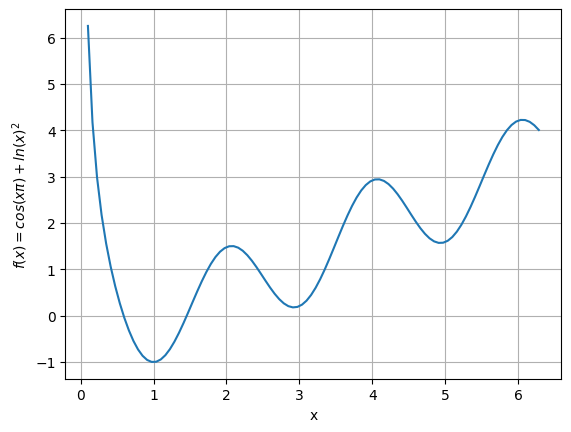

In [48]:
# we are not starting with 0, because there is also natural log, and log of 0 is infinity
x = np.linspace(.1, 2*np.pi, 100)

plt.plot(x, fx(x))
plt.grid()
plt.xlabel("x")
plt.ylabel("$f(x) = cos(x\\pi) + ln(x)^2$")
plt.show()

### Compute the Limit as $x$ goes to 3

In [43]:
expFact = 4
g = 1.000001-np.linspace(1, .00001**expFact, 10)**(1/expFact)

x_from_left = 3-g
x_from_right = 3+g

limit_from_left = fx(x_from_left)
limit_from_right = fx(x_from_right)

# 0th elements are the closest limits from either side
print(f"Limit approaches {limit_from_left[0]} from the left.")
print(f"Limit approaches {limit_from_right[0]} from the right.")
print(f"Function value: {fx(3)} at x = 3")

Limit approaches 0.20694822840931304 from the left.
Limit approaches 0.20694969322569812 from the right.
Function value: 0.20694896081258207 at x = 3


The Reason why they are not equal because they are ***numpy*** approximations, not true limits, true limits can be calculated by ***sympy***.

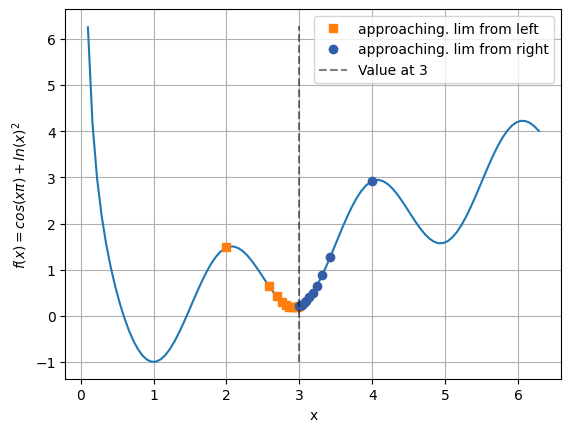

In [58]:
# we are not starting with 0, because there is also natural log, and log of 0 is infinity
x = np.linspace(.1, 2*np.pi, 100)

plt.plot(x, fx(x))
plt.grid()
plt.xlabel("x")
plt.ylabel("$f(x) = cos(x\\pi) + ln(x)^2$")

plt.plot(x_from_left, limit_from_left, 's', label="approaching. lim from left")
plt.plot(x_from_right, limit_from_right, 'o', label="approaching. lim from right", color='#335da6')

# create a dotted line at exactly 3
plt.plot([3,3], [-1, 2*np.pi], 'k--', alpha=.5, label="Value at 3")

plt.legend()
plt.show()

# Exercise: 2
### Analytic Limits in Sympy

In [103]:
x = sym.symbols('x')
fx = sym.cos(x * sym.pi) + sym.log(x)**2

display(Math("\\lim_{x\\to3^-} f(x) = %s"%sym.latex(sym.limit(fx, x, 3, dir='-'))))
display(Math("\\lim_{x\\to3^+} f(x) = %s"%sym.latex(sym.limit(fx, x, 3, dir='+'))))

display(Math("f(3) = %s"%sym.latex(fx.subs(x, 3))))
display(Math("f(3) = %g"%sym.N(fx.subs(x, 3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>